In [ ]:
# !pip install --upgrade --force-reinstall shapely


# In this notebook we will be doing a quality check and quality assurance

In [1]:
# Set a working directory
import os

directory_path = '/Users/cristianswift/Desktop/armbrust-lab/Seaflow-Machine-Learning/'
os.chdir(directory_path)


In [2]:
import pandas as pd

covari_path = 'data/modified/data_clean_covari.csv'
#using pandas to read in as a df
covari = (pd.read_csv(covari_path,parse_dates=[0]))
#taking a peak at the data
covari.head(3)


,time,population,lat,lon,biomass,salin,temp,cruisename,SiO2,POSi,...,NO2,NH4,FeT,DOP,DON,DOFe,DOC,DIC,CDOM,ALK
0,2016-04-20 07:00:00,Prochlorococcus,21.520326,-158.326984,10.520443,34.893785,24.351745,KOK1606,-0.022845,-0.000127,...,0.295276,1.282981,0.000015,0.013734,0.248717,0.000017,1.648093,1697.874775,0.000034,1954.87665
1,2016-04-20 07:00:00,Synechococcus,21.520326,-158.326984,0.341429,34.893785,24.351745,KOK1606,-0.022845,-0.000127,...,0.295276,1.282981,0.000015,0.013734,0.248717,0.000017,1.648093,1697.874775,0.000034,1954.87665
2,2016-04-20 07:00:00,nanoeukaryotes (2-5µm),21.520326,-158.326984,3.338212,34.893785,24.351745,KOK1606,-0.022845,-0.000127,...,0.295276,1.282981,0.000015,0.013734,0.248717,0.000017,1.648093,1697.874775,0.000034,1954.87665


## looking for relationshiops between all variables

In [3]:
import seaborn
import matplotlib.pyplot as plt

/var/folders/w6/gkpzzsjx0n101092kzm2dnh00000gn/T/ipykernel_5331/4226083609.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  seaborn.heatmap(covari_floats.corr().abs(),


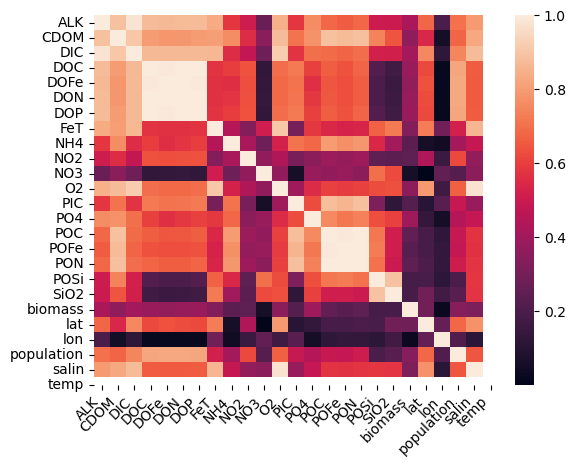

In [4]:
covari_floats = covari[covari.columns.difference(['time', 'cruisename', 'PopulationName', 'SizeClass'])]


seaborn.heatmap(covari_floats.corr().abs(),
                xticklabels=covari_floats.columns,
                yticklabels=covari_floats.columns)
plt.xticks(rotation=45, ha='right') #roating the xticks to make it easier to read
plt.show()
#plt.sup_title('Correlation of Features')

## What variables are most related? 

In [5]:
covari_corr = covari_floats.corr().abs().unstack()
covari_corr = covari_corr.sort_values(kind="quicksort")

print(covari_corr[covari_corr.between(0.8, 0.99)])

CDOM   FeT      0.804150
FeT    CDOM     0.804150
DOC    salin    0.824317
salin  DOC      0.824317
       DOP      0.824317
                  ...   
O2     DIC      0.914734
       temp     0.975989
temp   O2       0.975989
ALK    DIC      0.979711
DIC    ALK      0.979711
Length: 66, dtype: float64


/var/folders/w6/gkpzzsjx0n101092kzm2dnh00000gn/T/ipykernel_5331/3919752502.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  covari_corr = covari_floats.corr().abs().unstack()


### Random forests can be good at detecting interactions between different features, but highly correlated features can mask these interaction

In [6]:
# correlation_matrix = covari.corr()

# threshold = 0.8
# highly_correlated_features = []

# # iterate through the correlation matrix and identify highly correlated features
# for i in range(len(correlation_matrix.columns)):
#     for j in range(i+1, len(correlation_matrix.columns)):
#         if abs(correlation_matrix.iloc[i, j]) > threshold:
#             # append the pair of highly correlated features to the list
#             feature_i = correlation_matrix.columns[i]
#             feature_j = correlation_matrix.columns[j]
#             highly_correlated_features.append((feature_i, feature_j))
# highly_correlated_features

In [7]:
# # remove one feature from each highly correlated pair
# for feature_i, feature_j in highly_correlated_features:
#     importance_i = covari[feature_i].std()  # you can use any measure of importance here
#     importance_j = covari[feature_j].std()  # you can use any measure of importance here

#     # remove the feature with lower importance
#     if importance_i > importance_j:
#         covari.drop(feature_j, axis=1, inplace=True)
#     else:
#         covari.drop(feature_i, axis=1, inplace=True)


## Dropping uneeded columns

### renaming population names

In [8]:
covari['population'] = (
    covari['population']
    .replace({'picoeuk' : 'non_pro_syn'})
)
covari.head(5)

,time,population,lat,lon,biomass,salin,temp,cruisename,SiO2,POSi,...,NO2,NH4,FeT,DOP,DON,DOFe,DOC,DIC,CDOM,ALK
0,2016-04-20 07:00:00,Prochlorococcus,21.520326,-158.326984,10.520443,34.893785,24.351745,KOK1606,-0.022845,-0.000127,...,0.295276,1.282981,0.000015,0.013734,0.248717,0.000017,1.648093,1697.874775,0.000034,1954.87665
1,2016-04-20 07:00:00,Synechococcus,21.520326,-158.326984,0.341429,34.893785,24.351745,KOK1606,-0.022845,-0.000127,...,0.295276,1.282981,0.000015,0.013734,0.248717,0.000017,1.648093,1697.874775,0.000034,1954.87665
2,2016-04-20 07:00:00,nanoeukaryotes (2-5µm),21.520326,-158.326984,3.338212,34.893785,24.351745,KOK1606,-0.022845,-0.000127,...,0.295276,1.282981,0.000015,0.013734,0.248717,0.000017,1.648093,1697.874775,0.000034,1954.87665
3,2016-04-20 07:00:00,picoeukaryotes (< 2µm),21.520326,-158.326984,0.701902,34.893785,24.351745,KOK1606,-0.022845,-0.000127,...,0.295276,1.282981,0.000015,0.013734,0.248717,0.000017,1.648093,1697.874775,0.000034,1954.87665
4,2016-04-20 08:00:00,Prochlorococcus,21.662710,-158.323430,9.309387,34.902376,24.339265,KOK1606,-0.022845,-0.000127,...,0.295276,1.282981,0.000015,0.013734,0.248717,0.000017,1.648093,1697.874775,0.000034,1954.87665




## Saving machine learning ready dataset

In [9]:
covari.to_csv('data/modified/RF_ready_covari.csv', index=False)